In [ ]:
!pip install -U scikit-learn
!pip install -U scikit-datasets
!pip install tensorflow
!pip install keras

In [55]:
#Map google drive and the input and output files
from google.colab import drive
drive.mount('/content/drive')
Input = "/content/drive/My Drive/App/ResearchMethods/input/"
Output_Path = "/content/drive/My Drive/App/ResearchMethods/output/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import cv2
import os
from xml.etree import ElementTree
from matplotlib import pyplot as plt
# Any results you write to the current directory are saved as output.

In [61]:
#%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow import keras
#from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense
from keras import datasets, layers, models
keras = tf.keras

In [62]:
class_names = ['person','person-like']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

n_classes = 2
size = (200,200)

In [63]:
def load_data():
    datasets = ['Train', 'Test', 'Val']
    output = []

    for dataset in datasets:
        imags = []
        labels = []
        directoryA = Input + dataset +"/Annotations"
        directoryIMG = Input + dataset +"/JPEGImages/"
        file = os.listdir(directoryA)
        img = os.listdir(directoryIMG)
        file.sort()
        img.sort()

        i = 0
        for xml in file:

            xmlf = os.path.join(directoryA,xml)
            dom = ElementTree.parse(xmlf)
            vb = dom.findall('object')
            label = vb[0].find('name').text
            labels.append(class_names_label[label])

            img_path = directoryIMG + img[i]
            curr_img = cv2.imread(img_path)
            curr_img = cv2.resize(curr_img, size)
            imags.append(curr_img)
            i +=1

        imags = np.array(imags, dtype='float32')
        imags = imags / 255

      #  labels = pd.DataFrame(labels)
        labels = np.array(labels, dtype='int32')

        output.append((imags, labels))
    return output

In [64]:
(train_images, train_labels),(test_images, test_labels),(val_images, val_labels) = load_data()

In [65]:
train_images.shape

(944, 200, 200, 3)

In [66]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(train_images),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i]])
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [67]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [68]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2))

In [69]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [70]:
history = model.fit(train_images, train_labels, epochs=6,
                    validation_data=(test_images, test_labels))

Epoch 1/6
30/30 [==============================] - 51s 2s/step - loss: 1.6107 - accuracy: 0.5011 - val_loss: 0.6597 - val_accuracy: 0.5787
Epoch 2/6
30/30 [==============================] - 50s 2s/step - loss: 0.6436 - accuracy: 0.6324 - val_loss: 0.6934 - val_accuracy: 0.4936
Epoch 3/6
30/30 [==============================] - 50s 2s/step - loss: 0.5695 - accuracy: 0.7246 - val_loss: 0.6464 - val_accuracy: 0.6383
Epoch 4/6
30/30 [==============================] - 56s 2s/step - loss: 0.4479 - accuracy: 0.8114 - val_loss: 0.6539 - val_accuracy: 0.6468
Epoch 5/6
30/30 [==============================] - 51s 2s/step - loss: 0.2892 - accuracy: 0.8771 - val_loss: 0.7934 - val_accuracy: 0.6894
Epoch 6/6
30/30 [==============================] - 50s 2s/step - loss: 0.1961 - accuracy: 0.9333 - val_loss: 0.7804 - val_accuracy: 0.6851


In [71]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

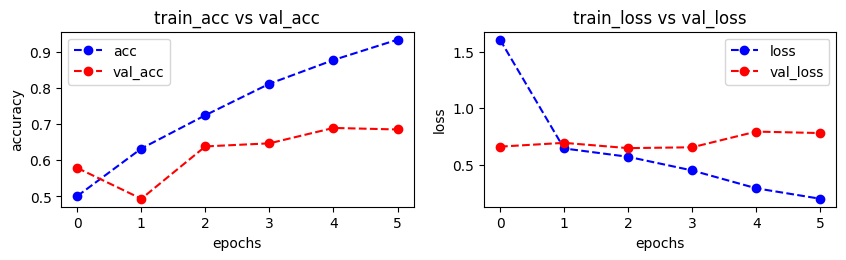

In [72]:
plot_accuracy_loss(history)

In [73]:
preds = model.predict(val_images)

5/5 [==============================] - 2s 374ms/step


In [74]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(val_images),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(val_images[i])
    plt.axis('off')
    x =np.argmax(preds[i]) # takes the maximum of of the 6 probabilites.
    plt.title((class_names[x]))

Output hidden; open in https://colab.research.google.com to view.

In [75]:
result = []
for i in range(len(preds)):
    result.append(np.argmax(preds[i]))

In [76]:
tn, fp, fn, tp = confusion_matrix(val_labels,result).ravel()

In [77]:
(tn, fp, fn, tp)

(59, 26, 31, 44)

Reference: https://www.kaggle.com/code/riccijaneabao/pedestrian-classification/notebook